# Plots of extreme indices

In [1]:
import xarray as xr, matplotlib.pyplot as plt
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????
import dask.diagnostics # dask allows you to check how long something is taking to load
import climtas # needed to count event statistics with a specified duration
import seaborn as sns
import scipy.stats # to calculate correlation

In [2]:
# import custom functions
import sys 
sys.path.append('/home/563/kb6999/Functions') # use this if the function file is in a different directory to the notebook

import frequently_used_functions as func
import plotting_functions as fplot
import model_functions as funcM
import reanalysis_functions as funcR
import Extreme_indices_functions as funcX
# import obs_functions as funcO

In [3]:
# define path where obs data is store
path = '/g/data/w48/kb6999/Observations/obs_netcdfs_T/'

In [4]:
# open daily T data from 5 stations 
daily_T = xr.open_dataset(f'{path}Daily_T_Aus_5S.nc')
daily_T

<xarray.Dataset>
Dimensions:  (station: 5, time: 15705)
Coordinates:
  * time     (time) datetime64[ns] 1878-01-01 1878-01-02 ... 1920-12-31
  * station  (station) object 'Adelaide (030420)' ... 'Sydney (066062)'
Data variables:
    Tmin     (station, time) float64 ...
    Tmax     (station, time) float64 ...

In [5]:
# Krakatoa years
# eruption date
e_date = pd.to_datetime(['1883-08','1902-10', '1963-03', '1982-04', '1991-06'])
# save arrays of times relative to each eruption
e_pre5yrs = e_date - 60 * pd.offsets.MonthBegin()
e_post5yrs = e_date + 61 * pd.offsets.MonthBegin()

In [6]:
# select out 10 years around Krakatoa
K_daily_T = daily_T.sel(time=slice(e_pre5yrs[0], e_post5yrs[0]))

In [7]:
# open netcdf of extreme indices
ex_index = xr.open_dataset(f'{path}Obs_extreme_indices.nc')
ex_index

<xarray.Dataset>
Dimensions:  (station: 5, time: 516)
Coordinates:
  * time     (time) datetime64[ns] 1878-01-31 1878-02-28 ... 1920-12-31
  * station  (station) object 'Adelaide (030420)' ... 'Sydney (066062)'
Data variables: (12/14)
    FD       (station, time) int64 ...
    SU       (station, time) int64 ...
    ID       (station, time) int64 ...
    TR       (station, time) int64 ...
    TXx      (station, time) float64 ...
    TNx      (station, time) float64 ...
    ...       ...
    TN10p    (station, time) float64 ...
    TX10p    (station, time) float64 ...
    TN90p    (station, time) float64 ...
    TX90p    (station, time) float64 ...
    DTR      (station, time) float64 ...
    ETR      (station, time) float64 ...

In [8]:
# take the 10 years around Krakatoa
K_ex_index = ex_index.sel(time=slice(e_pre5yrs[0], e_post5yrs[0]))
K_ex_index

<xarray.Dataset>
Dimensions:  (station: 5, time: 121)
Coordinates:
  * time     (time) datetime64[ns] 1878-08-31 1878-09-30 ... 1888-08-31
  * station  (station) object 'Adelaide (030420)' ... 'Sydney (066062)'
Data variables: (12/14)
    FD       (station, time) int64 0 0 0 0 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 0 0 0
    SU       (station, time) int64 1 2 10 12 19 24 22 16 ... 10 11 10 5 0 0 0 0
    ID       (station, time) int64 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    TR       (station, time) int64 0 0 1 4 2 8 7 7 1 0 0 ... 1 2 5 5 0 0 0 0 0 0
    TXx      (station, time) float64 26.2 26.6 30.9 40.1 ... 22.3 22.4 19.9 23.8
    TNx      (station, time) float64 14.5 14.7 20.6 23.0 ... 15.6 14.0 14.8 13.1
    ...       ...
    TN10p    (station, time) float64 29.03 3.333 3.226 0.0 ... 30.0 48.39 51.61
    TX10p    (station, time) float64 19.35 0.0 0.0 0.0 ... 13.33 29.03 29.03
    TN90p    (station, time) float64 0.0 0.0 3.226 13.33 ... 0.0 0.0 0.0 0.0
    TX90p    (station, time) float64 0.0 0.0 0.0 20.0 16.13 ... 0.0 0.0 0.0 0.0
    DTR      (station, time) float64 8.958 10.56 12.14 ... 7.237 7.677 8.803
    ETR      (station, time) float64 23.0 23.8 26.2 32.5 ... 16.4 16.9 15.8 20.0

## Figures

In [9]:
# define degree sign
deg = u'\N{DEGREE SIGN}'

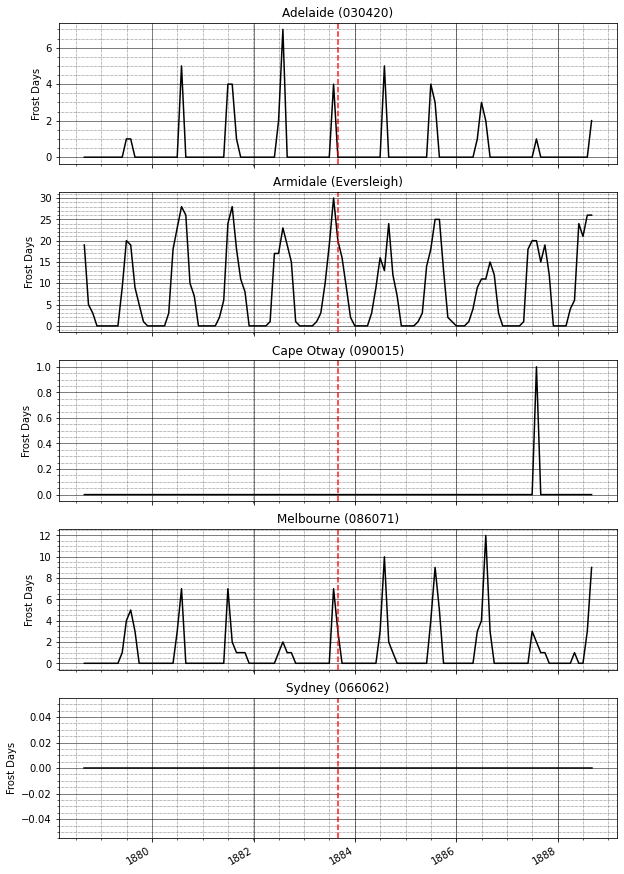

In [10]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(5, 1, sharex=True, figsize=(10,15)) # make a figure

with dask.diagnostics.ProgressBar():
    for i, s in enumerate(K_ex_index.station):
        fplot.timeseries_graph(K_ex_index.FD.sel(station=s), ax = axes[i])
        axes[i].set(ylabel= 'Frost Days', title = s.data) 

plt.savefig('O_timeseries_monthly_FD_stacked.png', dpi=300, bbox_inches='tight')

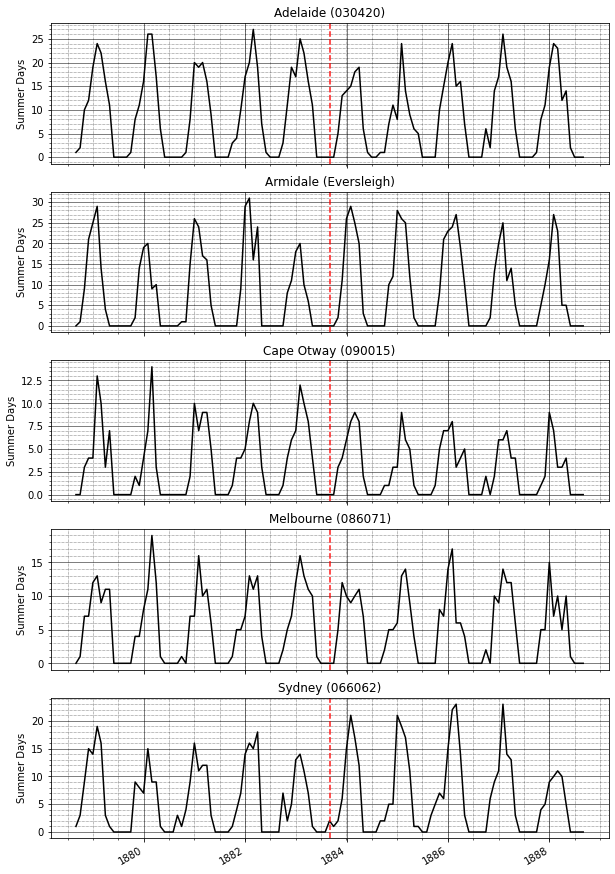

In [11]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(5, 1, sharex=True, figsize=(10,15)) # make a figure

with dask.diagnostics.ProgressBar():
    for i, s in enumerate(K_ex_index.station):
        fplot.timeseries_graph(K_ex_index.SU.sel(station=s), ax = axes[i])
        axes[i].set(ylabel= f'Summer Days', title = s.data) 

plt.savefig('O_timeseries_monthly_SU_stacked.png', dpi=300, bbox_inches='tight')

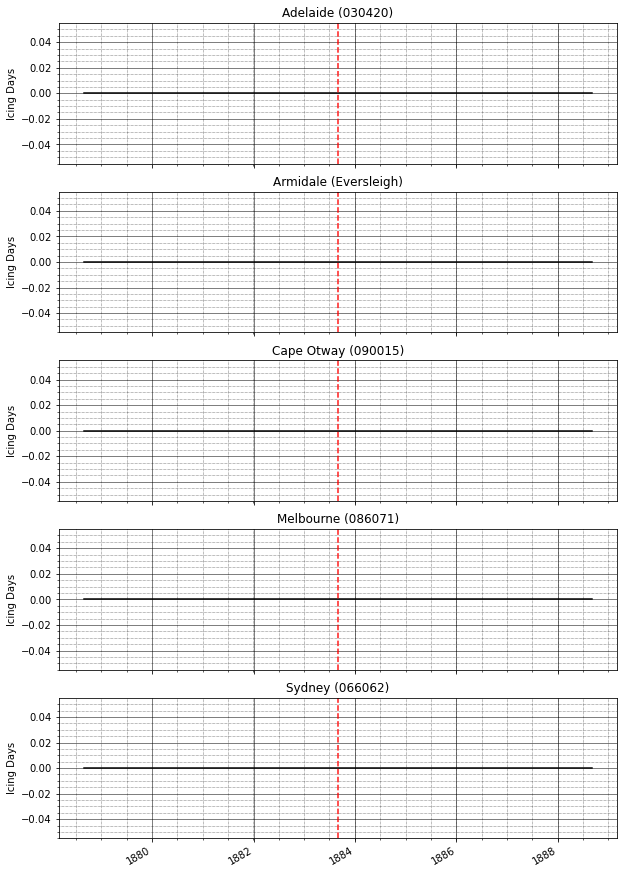

In [12]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(5, 1, sharex=True, figsize=(10,15)) # make a figure

with dask.diagnostics.ProgressBar():
    for i, s in enumerate(K_ex_index.station):
        fplot.timeseries_graph(K_ex_index.ID.sel(station=s), ax = axes[i])
        axes[i].set(ylabel= 'Icing Days', title = s.data) 

plt.savefig('O_timeseries_monthly_ID_stacked.png', dpi=300, bbox_inches='tight')

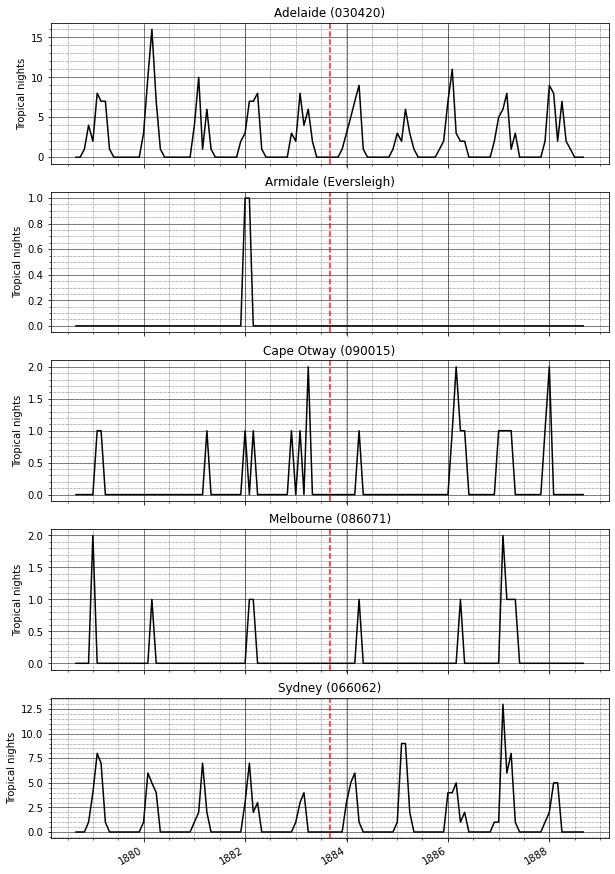

In [13]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(5, 1, sharex=True, figsize=(10,15)) # make a figure

with dask.diagnostics.ProgressBar():
    for i, s in enumerate(K_ex_index.station):
        fplot.timeseries_graph(K_ex_index.TR.sel(station=s), ax = axes[i])
        axes[i].set(ylabel= 'Tropical nights', title = s.data) 

plt.savefig('O_timeseries_monthly_TR_stacked.png', dpi=300, bbox_inches='tight')

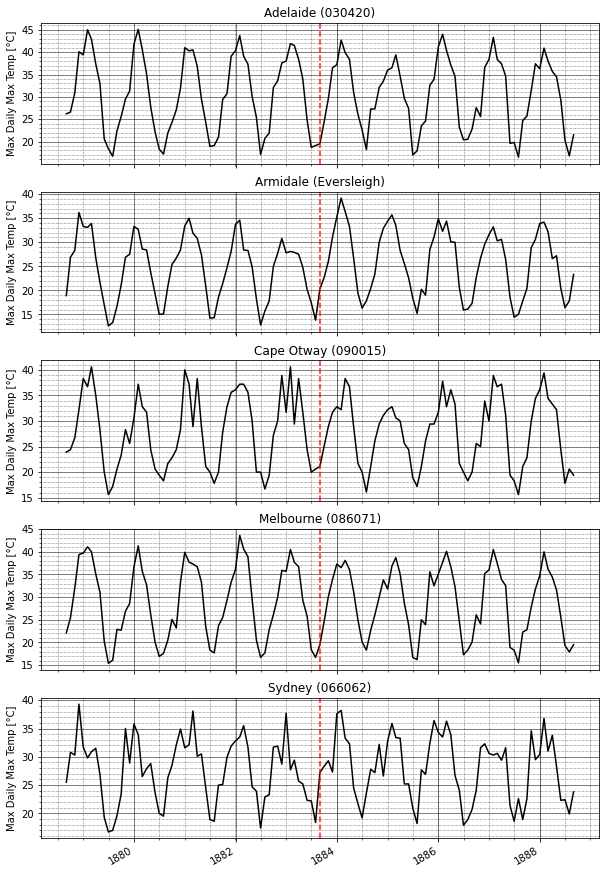

In [14]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(5, 1, sharex=True, figsize=(10,15)) # make a figure

with dask.diagnostics.ProgressBar():
    for i, s in enumerate(K_ex_index.station):
        fplot.timeseries_graph(K_ex_index.TXx.sel(station=s), ax = axes[i])
        axes[i].set(ylabel= f'Max Daily Max Temp [{deg}C]', title = s.data) 

plt.savefig('O_timeseries_monthly_TXx_stacked.png', dpi=300, bbox_inches='tight')

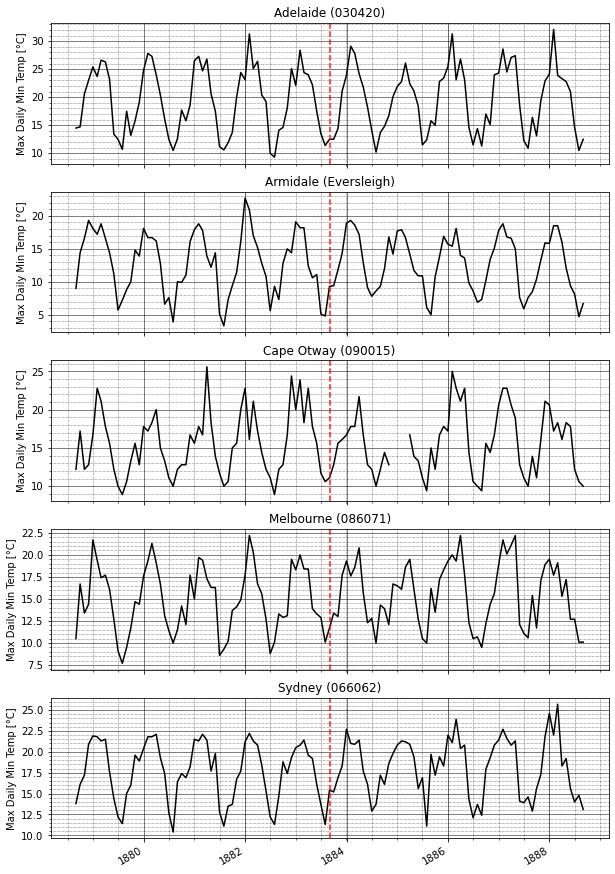

In [15]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(5, 1, sharex=True, figsize=(10,15)) # make a figure

with dask.diagnostics.ProgressBar():
    for i, s in enumerate(K_ex_index.station):
        fplot.timeseries_graph(K_ex_index.TNx.sel(station=s), ax = axes[i])
        axes[i].set(ylabel= f'Max Daily Min Temp [{deg}C]', title = s.data) 

plt.savefig('O_timeseries_monthly_TNx_stacked.png', dpi=300, bbox_inches='tight')

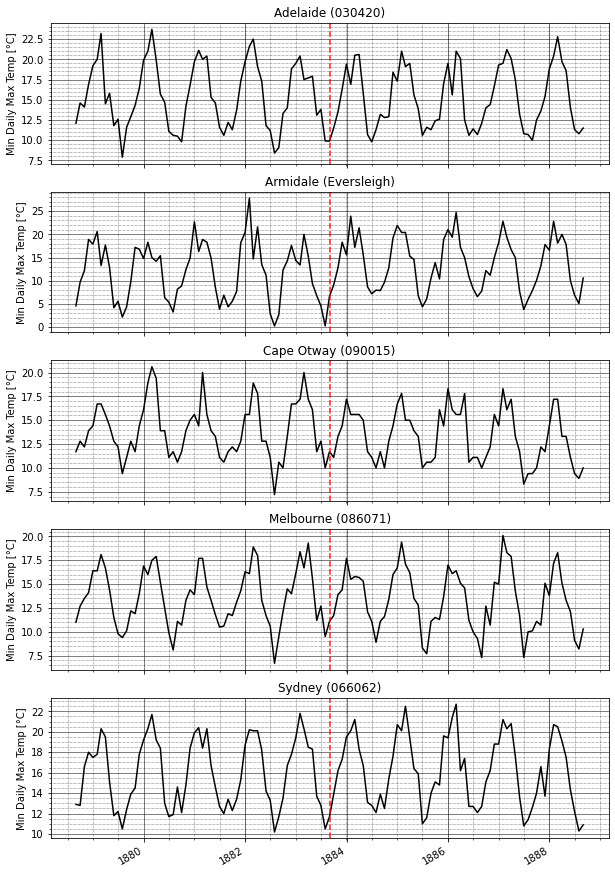

In [16]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(5, 1, sharex=True, figsize=(10,15)) # make a figure

with dask.diagnostics.ProgressBar():
    for i, s in enumerate(K_ex_index.station):
        fplot.timeseries_graph(K_ex_index.TXn.sel(station=s), ax = axes[i])
        axes[i].set(ylabel= f'Min Daily Max Temp [{deg}C]', title = s.data) 

plt.savefig('O_timeseries_monthly_TXn_stacked.png', dpi=300, bbox_inches='tight')

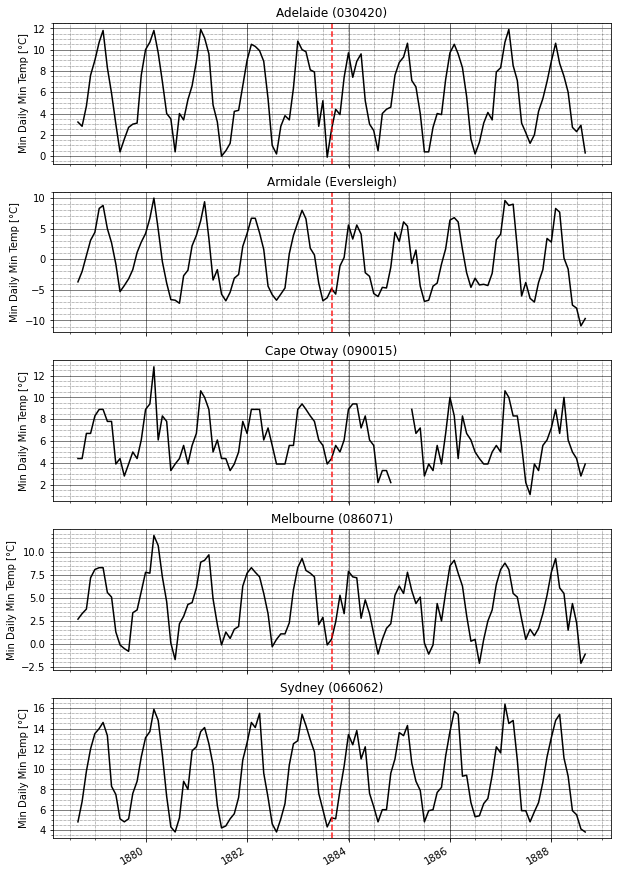

In [17]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(5, 1, sharex=True, figsize=(10,15)) # make a figure

with dask.diagnostics.ProgressBar():
    for i, s in enumerate(K_ex_index.station):
        fplot.timeseries_graph(K_ex_index.TNn.sel(station=s), ax = axes[i])
        axes[i].set(ylabel= f'Min Daily Min Temp [{deg}C]', title = s.data) 

plt.savefig('O_timeseries_monthly_TNn_stacked.png', dpi=300, bbox_inches='tight')

### percentile plots

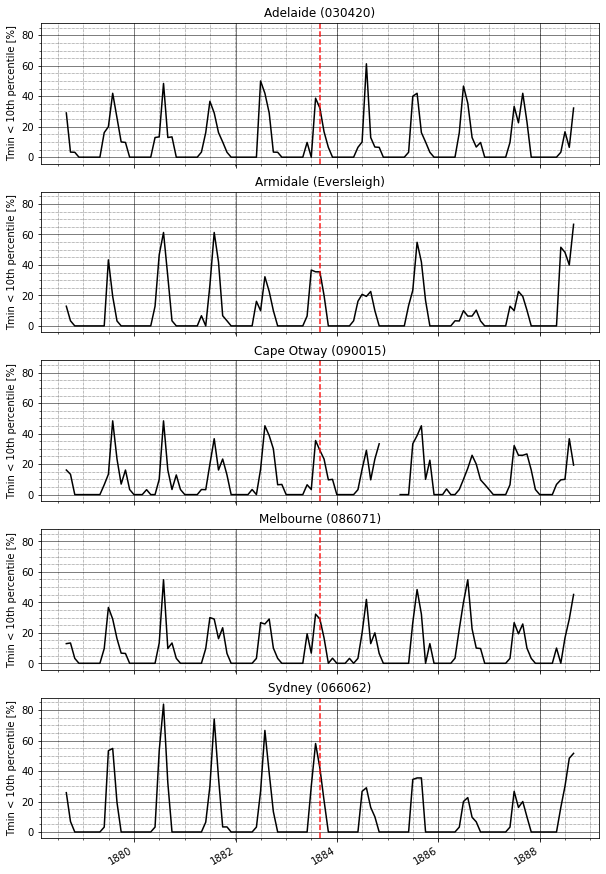

In [18]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(5, 1, sharex=True, sharey=True, figsize=(10,15)) # make a figure

with dask.diagnostics.ProgressBar():
    for i, s in enumerate(K_ex_index.station):
        fplot.timeseries_graph(K_ex_index.TN10p.sel(station=s), ax = axes[i])
        axes[i].set(ylabel= f'Tmin < 10th percentile [%]', title = s.data) 

plt.savefig('O_timeseries_monthly_TN10p_stacked.png', dpi=300, bbox_inches='tight')

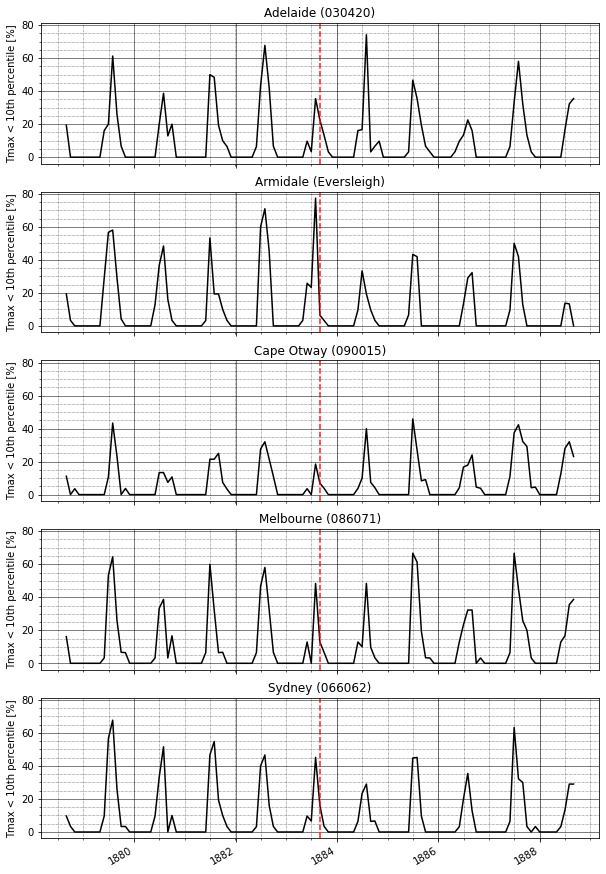

In [19]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(5, 1, sharex=True, sharey=True, figsize=(10,15)) # make a figure

with dask.diagnostics.ProgressBar():
    for i, s in enumerate(K_ex_index.station):
        fplot.timeseries_graph(K_ex_index.TX10p.sel(station=s), ax = axes[i])
        axes[i].set(ylabel= f'Tmax < 10th percentile [%]', title = s.data) 

plt.savefig('O_timeseries_monthly_TX10p_stacked.png', dpi=300, bbox_inches='tight')

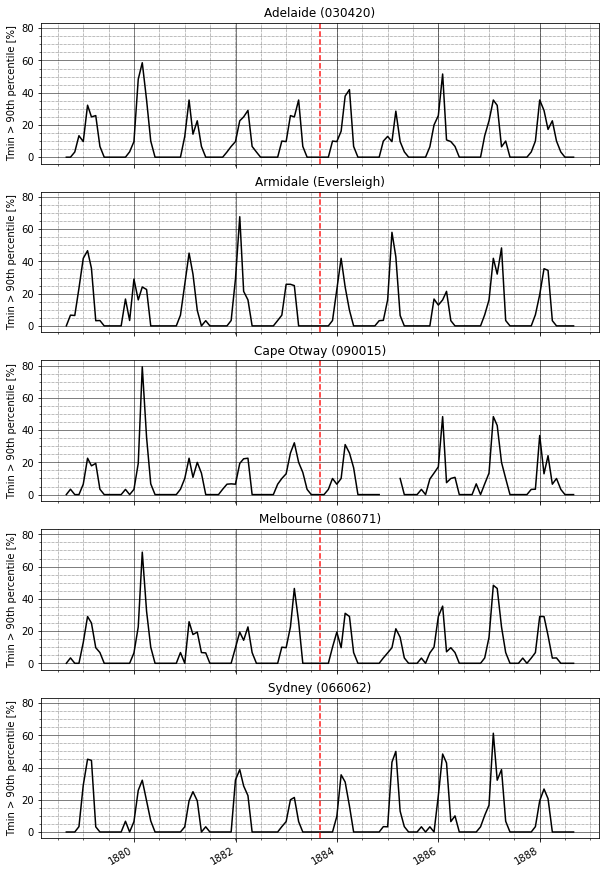

In [20]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(5, 1, sharex=True, sharey=True, figsize=(10,15)) # make a figure

with dask.diagnostics.ProgressBar():
    for i, s in enumerate(K_ex_index.station):
        fplot.timeseries_graph(K_ex_index.TN90p.sel(station=s), ax = axes[i])
        axes[i].set(ylabel= f'Tmin > 90th percentile [%]', title = s.data) 

plt.savefig('O_timeseries_monthly_TN90p_stacked.png', dpi=300, bbox_inches='tight')

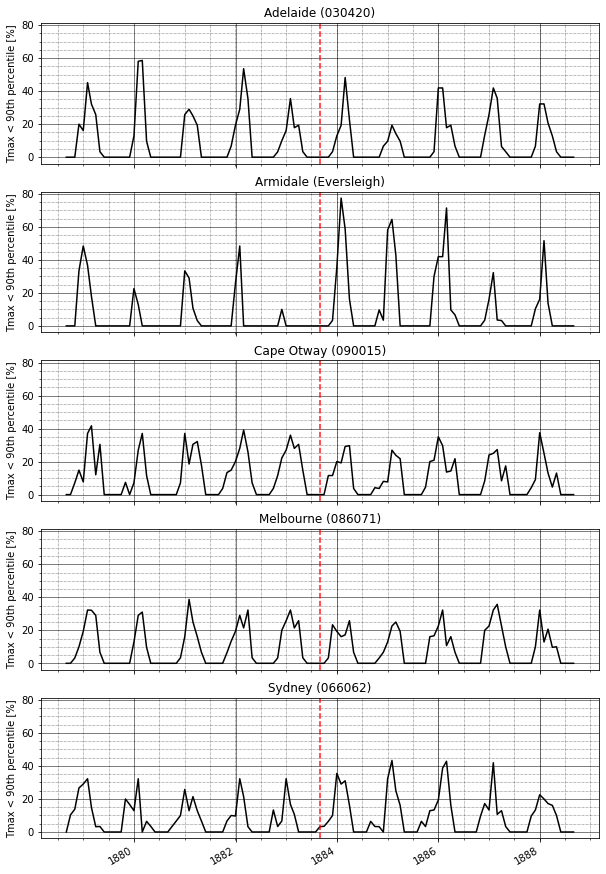

In [21]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(5, 1, sharex=True, sharey=True, figsize=(10,15)) # make a figure

with dask.diagnostics.ProgressBar():
    for i, s in enumerate(K_ex_index.station):
        fplot.timeseries_graph(K_ex_index.TX90p.sel(station=s), ax = axes[i])
        axes[i].set(ylabel= f'Tmax < 90th percentile [%]', title = s.data) 

plt.savefig('O_timeseries_monthly_TX90p_stacked.png', dpi=300, bbox_inches='tight')

### temperature range plots

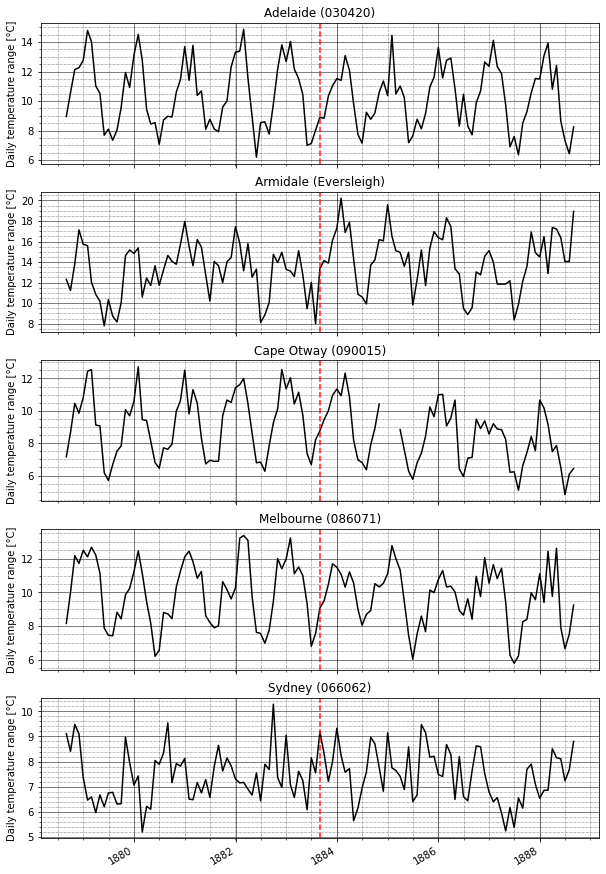

In [22]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(5, 1, sharex=True, figsize=(10,15)) # make a figure

with dask.diagnostics.ProgressBar():
    for i, s in enumerate(K_ex_index.station):
        fplot.timeseries_graph(K_ex_index.DTR.sel(station=s), ax = axes[i])
        axes[i].set(ylabel= f'Daily temperature range [{deg}C]', title = s.data) 

plt.savefig('O_timeseries_monthly_DTR_stacked.png', dpi=300, bbox_inches='tight')

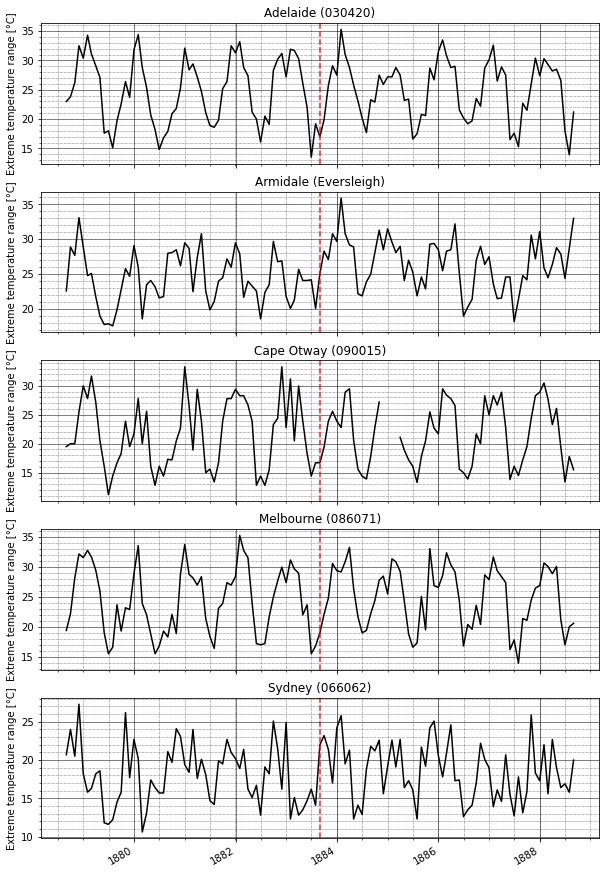

In [23]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(5, 1, sharex=True, figsize=(10,15)) # make a figure

with dask.diagnostics.ProgressBar():
    for i, s in enumerate(K_ex_index.station):
        fplot.timeseries_graph(K_ex_index.ETR.sel(station=s), ax = axes[i])
        axes[i].set(ylabel= f'Extreme temperature range [{deg}C]', title = s.data) 

plt.savefig('O_timeseries_monthly_ETR_stacked.png', dpi=300, bbox_inches='tight')